In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR
# Setting random seed to get reproducible runs
RSEED = 100

# Part 1: Data Processing

In [2]:
data = pd.read_csv("../../factorsCancerperCounty.csv")

In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
data.columns

Index(['locale', 'fips', 'annual_count_avg', 'areatype', 'cancer', 'stateFIPS',
       'state', 'cancer_description', 'ACID', 'ENRG', 'ETOX', 'EUTR', 'FOOD',
       'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP', 'HTOX', 'JOBS', 'LAND',
       'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST', 'REN', 'SMOG', 'VADD',
       'WATR'],
      dtype='object')

In [5]:
factors=np.array(['ACID', 'ENRG', 'ETOX', 'EUTR', 'FOOD',
       'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP', 'HTOX', 'JOBS', 'LAND',
       'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST', 'REN', 'SMOG', 'VADD',
       'WATR'])

In [6]:
data

,locale,fips,annual_count_avg,areatype,cancer,stateFIPS,state,cancer_description,ACID,ENRG,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
0,"Autauga County(6,10)",1001,304,county,1,1,alabama,All Cancer Sites,299.152569,728644.544118,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
1,"Autauga County(6,10)",1001,8,county,3,1,alabama,Oral Cavity & Pharynx,299.152569,728644.544118,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
2,"Autauga County(6,10)",1001,3,county,17,1,alabama,Esophagus,299.152569,728644.544118,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
3,"Autauga County(6,10)",1001,6,county,18,1,alabama,Stomach,299.152569,728644.544118,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
4,"Autauga County(6,10)",1001,32,county,20,1,alabama,Colon & Rectum,299.152569,728644.544118,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72054,"Weston County(6,10)",56045,3,county,86,56,wyoming,Non-Hodgkin Lymphoma,34.618906,428737.854052,...,0.000817,17113.628433,348.003649,428660.792817,0.000395,0.000943,77.061234,1321.995548,12995.136488,47.904143
72055,"Weston County(6,10)",56045,3,county,90,56,wyoming,Leukemia,34.618906,428737.854052,...,0.000817,17113.628433,348.003649,428660.792817,0.000395,0.000943,77.061234,1321.995548,12995.136488,47.904143
72056,"Weston County(6,10)",56045,3,county,400,56,wyoming,Breast (in situ) (Female),34.618906,428737.854052,...,0.000817,17113.628433,348.003649,428660.792817,0.000395,0.000943,77.061234,1321.995548,12995.136488,47.904143
72057,"Weston County(6,10)",56045,3,county,515,56,wyoming,"Childhood (Ages <20, All Sites)",34.618906,428737.854052,...,0.000817,17113.628433,348.003649,428660.792817,0.000395,0.000943,77.061234,1321.995548,12995.136488,47.904143


In [7]:
print(data.dtypes)
data['annual_count_avg'].replace({r'[^\x00-\x7F]+':'0'}, regex=True, inplace=True)
data['annual_count_avg'] = data['annual_count_avg'].astype("float64")

locale                 object
fips                    int64
annual_count_avg       object
areatype               object
cancer                  int64
stateFIPS               int64
state                  object
cancer_description     object
ACID                  float64
ENRG                  float64
ETOX                  float64
EUTR                  float64
FOOD                  float64
GCC                   float64
HAPS                  float64
HAZW                  float64
HC                    float64
HNC                   float64
HRSP                  float64
HTOX                  float64
JOBS                  float64
LAND                  float64
METL                  float64
MINE                  float64
MSW                   float64
NREN                  float64
OZON                  float64
PEST                  float64
REN                   float64
SMOG                  float64
VADD                  float64
WATR                  float64
dtype: object


In [8]:
cancerVals=data["cancer"].unique()
cancerVals

array([  1,   3,  17,  18,  20,  35,  40,  47,  53,  55,  57,  58,  61,
        66,  71,  72,  76,  80,  86,  90, 400, 515, 516])

In [9]:
cancerDescr=data["cancer_description"].unique()
cancerDescr

array(['All Cancer Sites', 'Oral Cavity & Pharynx', 'Esophagus',
       'Stomach', 'Colon & Rectum', 'Liver & Bile Duct', 'Pancreas',
       'Lung & Bronchus', 'Melanoma of the Skin', 'Breast (Female)',
       'Cervix (Female)', 'Uterus (Corpus & Uterus, NOS) (Female)',
       'Ovary (Female)', 'Prostate (Male)', 'Bladder',
       'Kidney & Renal Pelvis', 'Brain & ONS', 'Thyroid',
       'Non-Hodgkin Lymphoma', 'Leukemia', 'Breast (in situ) (Female)',
       'Childhood (Ages <20, All Sites)',
       'Childhood (Ages <15, All Sites)'], dtype=object)

In [10]:
cancerDescription=data[["cancer","cancer_description"]]
cancerTypes=cancerDescription.groupby(["cancer","cancer_description"]).sum().reset_index()
print(cancerTypes)
cancer=cancerTypes["cancer"]==3
print("example:")
print(cancerTypes[cancer]["cancer_description"].to_string())

cancer                      cancer_description
0        1                        All Cancer Sites
1        3                   Oral Cavity & Pharynx
2       17                               Esophagus
3       18                                 Stomach
4       20                          Colon & Rectum
5       35                       Liver & Bile Duct
6       40                                Pancreas
7       47                         Lung & Bronchus
8       53                    Melanoma of the Skin
9       55                         Breast (Female)
10      57                         Cervix (Female)
11      58  Uterus (Corpus & Uterus, NOS) (Female)
12      61                          Ovary (Female)
13      66                         Prostate (Male)
14      71                                 Bladder
15      72                   Kidney & Renal Pelvis
16      76                             Brain & ONS
17      80                                 Thyroid
18      86                    Non-H

# Part 2: Random Forest Regressor

## Hypertuning

In [12]:
cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1=newData.loc[:, 'ACID':'WATR']
y = newData['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)
scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (2193, 24)
XTest (940, 24)


In [14]:
# Create the model with 10 trees
#regressor = RandomForestRegressor(n_estimators = 100,
                                 # random_state = RSEED)

# Fit on training data
#regressor.fit(X_train, y_train)

parameters={'n_estimators':[4, 16,32,50,64,100,128, 256],'max_depth': [2, 8, 16,32,50,64]}
rf = RandomForestRegressor(random_state = RSEED)
clf = GridSearchCV(rf, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=100,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_

In [15]:
print(clf.best_params_)

{'max_depth': 8, 'n_estimators': 100}


## Random Forest Loop

cancer type: 1
0    All Cancer Sites
Creating RandomForest Model and Fitting the Data
score 0.8852407861819583
Feature Importance
indecis: [ 4 16 14 12 18  3 22 10  6  5  7 19  2  0  9  8 11 21  1 17 13 15 20 23]
importances: [0.49268192 0.12579432 0.07567727 0.05688776 0.04149034 0.02959606
 0.02280888 0.02127417 0.02013722 0.01699096 0.01452833 0.01234892
 0.01170191 0.01157722 0.01117984 0.00854697 0.00459369 0.00424026
 0.00399506 0.00363218 0.00308794 0.0028779  0.00219499 0.00215589]
features: ['FOOD' 'MSW' 'METL' 'JOBS' 'OZON' 'EUTR' 'VADD' 'HRSP' 'HAPS' 'GCC'
 'HAZW' 'PEST' 'ETOX' 'ACID' 'HNC' 'HC' 'HTOX' 'SMOG' 'ENRG' 'NREN' 'LAND'
 'MINE' 'REN' 'WATR']


cancer type: 3
1    Oral Cavity & Pharynx
Creating RandomForest Model and Fitting the Data
score 0.8912823129262131
Feature Importance
indecis: [ 4 16 14 18  6 12 10  3 22  7  2  0 19  8 11  9  5 15  1 21 17 13 20 23]
importances: [0.5477527  0.12695945 0.0518122  0.04423135 0.03681129 0.03081746
 0.02293407 0.0227872  0.0174

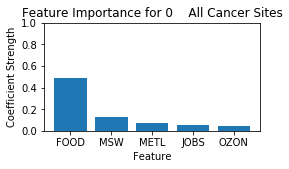

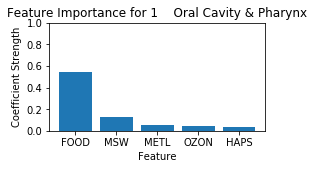

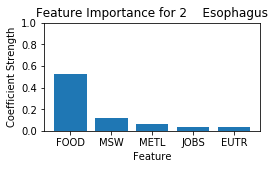

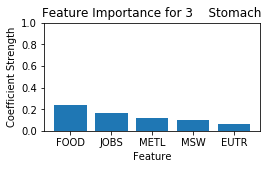

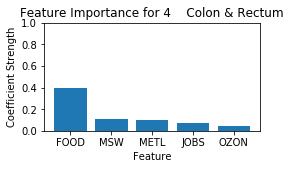

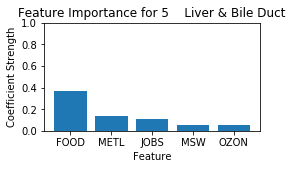

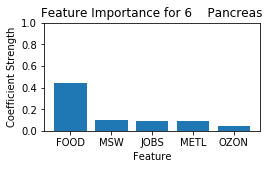

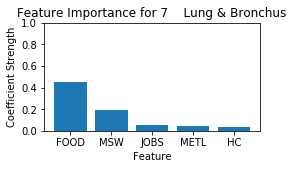

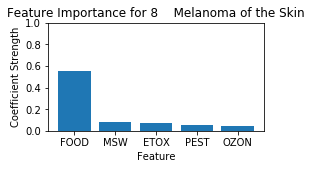

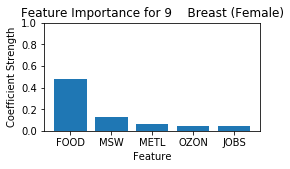

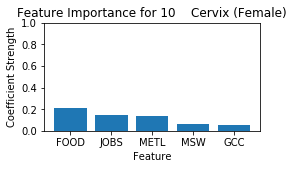

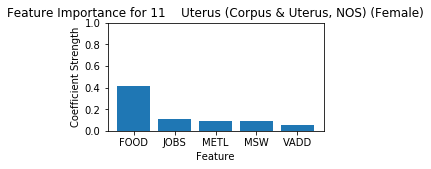

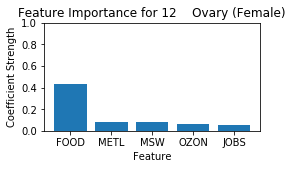

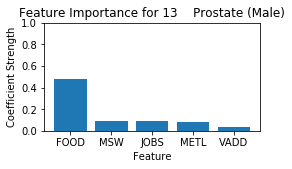

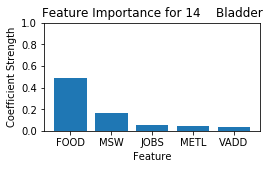

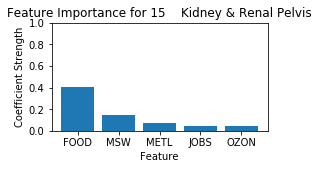

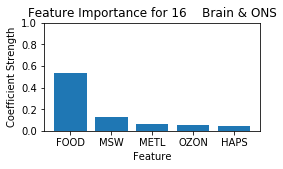

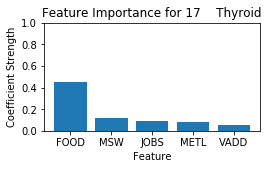

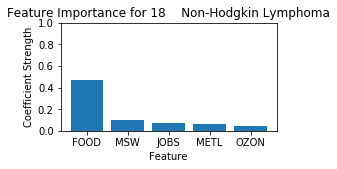

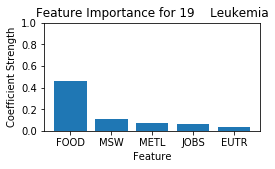

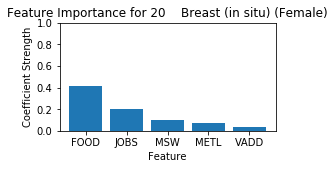

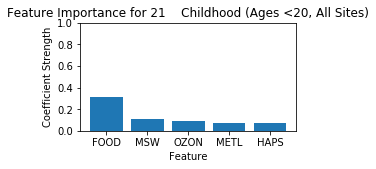

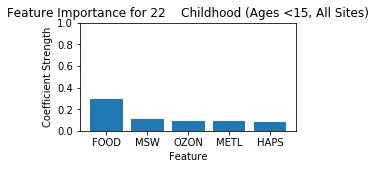

In [16]:
sum1 = 0

for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating RandomForest Model
    print("Creating RandomForest Model and Fitting the Data")
    rf = RandomForestRegressor(n_estimators = 100,
                                      max_depth= 8, 
                                      random_state = RSEED)

    # Fit on training data
    rf.fit(X_train, y_train)
    
    #Evaluation
    r2_score=rf.score(X_test, y_test)
    print("score",r2_score)
    sum1 += r2_score

    #Feature Importance
    print("Feature Importance")
    features=rf.feature_importances_
    #print(features)
    ind = np.argsort(features)[::-1]
    print("indecis:",ind)
    imp = features[ind]
    print("importances:",imp)
    cols =factors[ind]
    print("features:",cols)
    
    #plot the importance factors
    fig=plt.figure(figsize=(3,1.5))
    ax = fig.add_axes([0,0,1,1])
    ax.set_title('Feature Importance for {}'.format(discr))
    ax.bar( cols[:5].tolist(),imp[:5].tolist())
    ax.set_ylabel("Coefficient Strength")
    ax.set_xlabel("Feature")
    plt.ylim(0, 1)
    fig.show()
    print("\n")

print(f"Average score: {sum1/len(cancerVals)}")

# Logistic Regression

## Hypertuning

In [17]:
cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1=newData.loc[:, 'ACID':'WATR']
y = newData['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)
scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (2193, 24)
XTest (940, 24)


In [18]:
# Create the model with 10 trees
#regressor = RandomForestRegressor(n_estimators = 100,
                                 # random_state = RSEED)

# Fit on training data
#regressor.fit(X_train, y_train)

parameters={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter': [64,100,128,200,256,400,528,1000]}
lr = LogisticRegression(random_state = RSEED)
clf = GridSearchCV(lr, parameters)
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [19]:
print(clf.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

## Logistic Regression Loop

In [21]:
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating Logistic Regression Model
    print("Creating Logistic Regression Model and Fitting the Data")
    lr = LogisticRegression(random_state=RSEED,solver='sag' ,max_iter=2000)

    # Fit on training data
    lr.fit(X_train, y_train)
    
    #Evaluation
    r2_score=lr.score(X_test, y_test)
    print("score",r2_score)
    print("\n")
    sum1 += r2_score

print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating Logistic Regression Model and Fitting the Data
score 0.06170212765957447


cancer type: 3
1    Oral Cavity & Pharynx
Creating Logistic Regression Model and Fitting the Data
score 0.3606382978723404


cancer type: 17
2    Esophagus
Creating Logistic Regression Model and Fitting the Data
score 0.625531914893617


cancer type: 18
3    Stomach
Creating Logistic Regression Model and Fitting the Data
score 0.5914893617021276


cancer type: 20
4    Colon & Rectum
Creating Logistic Regression Model and Fitting the Data
score 0.1148936170212766


cancer type: 35
5    Liver & Bile Duct
Creating Logistic Regression Model and Fitting the Data
score 0.5212765957446809


cancer type: 40
6    Pancreas
Creating Logistic Regression Model and Fitting the Data
score 0.37127659574468086


cancer type: 47
7    Lung & Bronchus
Creating Logistic Regression Model and Fitting the Data
score 0.08936170212765958


cancer type: 53
8    Melanoma of the Skin
Creating Lo

# SVR

## Hypertuning

In [22]:
cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1=newData.loc[:, 'ACID':'WATR']
y = newData['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)
scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (2193, 24)
XTest (940, 24)


In [23]:
# Create the model with 10 trees
#regressor = RandomForestRegressor(n_estimators = 100,
                                 # random_state = RSEED)

# Fit on training data
#regressor.fit(X_train, y_train)


parameters={'C': [0.01,0.1,1],'epsilon':[0,0.001,0.01,0.1,1],'tol':[1e-5,1e-3,1e-1],'max_iter': [64,100,128,200,256,400,528,1000,2000]}
svr =LinearSVR(random_state = RSEED)
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=100, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1],
                         'epsilon': [0, 0.001, 0.01, 0.1, 1],
                         'max_iter': [64, 100, 128, 200, 256, 400, 528, 1000,
                                      2000],
                         'tol': [1e-05, 0.001, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
print(clf.best_params_)

{'C': 1, 'epsilon': 0.1, 'max_iter': 64, 'tol': 0.001}


## SVR Loop

In [25]:
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating SVR Model
    print("Creating SVR Model and Fitting the Data")
    svr = LinearSVR(random_state=0, C= 1, epsilon= 0, max_iter=64, tol= 0.1)

    # Fit on training data
    svr.fit(X_train, y_train)
    
    #Evaluation
    r2_score=svr.score(X_test, y_test)
    print("score",r2_score)
    sum1 += r2_score

print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating SVR Model and Fitting the Data
score 0.7474545338901919
cancer type: 3
1    Oral Cavity & Pharynx
Creating SVR Model and Fitting the Data
score 0.8933521326286444
cancer type: 17
2    Esophagus
Creating SVR Model and Fitting the Data
score 0.8918194483723286
cancer type: 18
3    Stomach
Creating SVR Model and Fitting the Data
score 0.8792791981882132
cancer type: 20
4    Colon & Rectum
Creating SVR Model and Fitting the Data
score 0.8510748360144116
cancer type: 35
5    Liver & Bile Duct
Creating SVR Model and Fitting the Data
score 0.8614918235153513
cancer type: 40
6    Pancreas
Creating SVR Model and Fitting the Data
score 0.9060606919337391
cancer type: 47
7    Lung & Bronchus
Creating SVR Model and Fitting the Data
score 0.7776389359564655
cancer type: 53
8    Melanoma of the Skin
Creating SVR Model and Fitting the Data
score 0.8049786140896071
cancer type: 55
9    Breast (Female)
Creating SVR Model and Fitting the Data
score 0.9033023

## Other Models

In [11]:
from sklearn import linear_model

cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1 = newData.loc[:, 'ACID':'WATR']
y = newData['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)
scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (2193, 24)
XTest (940, 24)


In [27]:
ridge = linear_model.Ridge(alpha=0.5).fit(X_train, y_train)

In [28]:
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating SVR Model
    print("Creating Ridge Model and Fitting the Data")
    ridge = linear_model.Ridge(alpha=0.5).fit(X_train, y_train)
    
    #Evaluation
    r2_score = ridge.score(X_test, y_test)
    print("score", r2_score)
    sum1 += r2_score

print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating Ridge Model and Fitting the Data
score 0.9041908791594692
cancer type: 3
1    Oral Cavity & Pharynx
Creating Ridge Model and Fitting the Data
score 0.8786090327984515
cancer type: 17
2    Esophagus
Creating Ridge Model and Fitting the Data
score 0.8860875051491941
cancer type: 18
3    Stomach
Creating Ridge Model and Fitting the Data
score 0.7328417014841124
cancer type: 20
4    Colon & Rectum
Creating Ridge Model and Fitting the Data
score 0.898932491770613
cancer type: 35
5    Liver & Bile Duct
Creating Ridge Model and Fitting the Data
score 0.811496374772548
cancer type: 40
6    Pancreas
Creating Ridge Model and Fitting the Data
score 0.9041496838000206
cancer type: 47
7    Lung & Bronchus
Creating Ridge Model and Fitting the Data
score 0.8739565057638186
cancer type: 53
8    Melanoma of the Skin
Creating Ridge Model and Fitting the Data
score 0.7251933481773529
cancer type: 55
9    Breast (Female)
Creating Ridge Model and Fitting the Da

In [29]:
from sklearn.linear_model import ElasticNet
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating SVR Model
    print("Creating Elastic Net Model and Fitting the Data")
    eNet = ElasticNet(random_state=RSEED).fit(X_train, y_train)
    
    #Evaluation
    r2_score = eNet.score(X_test, y_test)
    print("score", r2_score)
    sum1 += r2_score

print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating Elastic Net Model and Fitting the Data
score 0.79061587414443
cancer type: 3
1    Oral Cavity & Pharynx
Creating Elastic Net Model and Fitting the Data
score 0.7788398067569556
cancer type: 17
2    Esophagus
Creating Elastic Net Model and Fitting the Data
score 0.7120678049353744
cancer type: 18
3    Stomach
Creating Elastic Net Model and Fitting the Data
score 0.8159431942809967
cancer type: 20
4    Colon & Rectum
Creating Elastic Net Model and Fitting the Data
score 0.7829807824271937
cancer type: 35
5    Liver & Bile Duct
Creating Elastic Net Model and Fitting the Data
score 0.8058493379985192
cancer type: 40
6    Pancreas
Creating Elastic Net Model and Fitting the Data
score 0.7810035879722904
cancer type: 47
7    Lung & Bronchus
Creating Elastic Net Model and Fitting the Data
score 0.7199437465351546
cancer type: 53
8    Melanoma of the Skin
Creating Elastic Net Model and Fitting the Data
score 0.6876629989316139
cancer type: 55
9    B

In [13]:
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating SVR Model
    print("Creating Lasso Model and Fitting the Data")
    lasso = linear_model.Lasso(alpha=0.001).fit(X_train, y_train)
    
    #Evaluation
    r2_score = lasso.score(X_test, y_test)
    print("score", r2_score)
    sum1 += r2_score

print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating Lasso Model and Fitting the Data
score 0.8956406363331665
cancer type: 3
1    Oral Cavity & Pharynx
Creating Lasso Model and Fitting the Data
score 0.8695910974892757
cancer type: 17
2    Esophagus
Creating Lasso Model and Fitting the Data
score 0.8778707688327243
cancer type: 18
3    Stomach
Creating Lasso Model and Fitting the Data
score 0.7189819086166559
cancer type: 20
4    Colon & Rectum
Creating Lasso Model and Fitting the Data
score 0.893636933279354
cancer type: 35
5    Liver & Bile Duct
Creating Lasso Model and Fitting the Data
score 0.7986272742933912
cancer type: 40
6    Pancreas
Creating Lasso Model and Fitting the Data
score 0.8951537817539031
cancer type: 47
7    Lung & Bronchus
Creating Lasso Model and Fitting the Data
score 0.8659233143209213
cancer type: 53
8    Melanoma of the Skin
Creating Lasso Model and Fitting the Data
score 0.7290381837664954
cancer type: 55
9    Breast (Female)
Creating Lasso Model and Fitting the D

In [14]:
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating SVR Model
    print("Creating Lasso Model and Fitting the Data")
    lasso = linear_model.LassoLars(alpha=0.01).fit(X_train, y_train)
    
    #Evaluation
    r2_score = lasso.score(X_test, y_test)
    print("score", r2_score)
    sum1 += r2_score

print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating Lasso Model and Fitting the Data
score 0.9086708597673748
cancer type: 3
1    Oral Cavity & Pharynx
Creating Lasso Model and Fitting the Data
score 0.8940992946889552
cancer type: 17
2    Esophagus
Creating Lasso Model and Fitting the Data
score 0.7636729960286662
cancer type: 18
3    Stomach
Creating Lasso Model and Fitting the Data
score 0.8487729998244475
cancer type: 20
4    Colon & Rectum
Creating Lasso Model and Fitting the Data
score 0.903209150627625
cancer type: 35
5    Liver & Bile Duct
Creating Lasso Model and Fitting the Data
score 0.8614943510775305
cancer type: 40
6    Pancreas
Creating Lasso Model and Fitting the Data
score 0.8971735648636953
cancer type: 47
7    Lung & Bronchus
Creating Lasso Model and Fitting the Data
score 0.8704738560054132
cancer type: 53
8    Melanoma of the Skin
Creating Lasso Model and Fitting the Data
score 0.7755703328535303
cancer type: 55
9    Breast (Female)
Creating Lasso Model and Fitting the D

In [14]:
lasso.coef_

array([  1.59805801,  11.53195082,  12.65502842,   1.9246522 ,
        18.67438166,   3.71333888,  -2.57980198,  -0.10193608,
         5.04023737,  -4.11876163,  -2.63343895,   1.26048159,
        -1.09353188,  -1.08154694,   0.36533518,   0.03035794,
         5.54140127, -10.84244426,   1.59502037, -11.30949475,
         0.12809534,  -2.18070165, -14.96478929,  -2.77752436])

In [15]:
lasso.intercept_

5.0405836753305975

In [16]:
import numpy as np
np.savetxt("weights2.csv", lasso.coef_, delimiter=",")

In [17]:
lasso.predict(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]).reshape(1, -1))

array([-613.89612511])

## Fake Model 1 Architecture

In [19]:
weight1 = np.random.randn(5, 24)
weight1

array([[-1.55928713, -1.02608311, -0.36016006,  1.83825808,  1.30768727,
        -0.97787046, -1.25724702, -1.69085219,  0.2060717 ,  1.29417915,
         1.56914404, -0.38374504,  0.64293022,  0.56987297,  0.32927836,
         0.01568881,  1.06039482, -0.99382327, -0.84725172,  0.34380823,
         0.44748803, -1.58402653,  0.00547606,  1.30286134],
       [ 1.83703983, -0.48286289, -0.88998007, -0.574926  ,  1.02895561,
         2.31191671,  2.43026459, -0.59418701,  0.98948296, -0.35874752,
         0.1719419 ,  0.43422497, -2.67775384, -0.64570343,  0.55545083,
        -0.22179406,  0.41477929,  1.29339129,  0.42514257,  1.30121243,
         2.41604052,  0.0185319 ,  0.49540445,  0.5638645 ],
       [ 0.56775043, -0.68287381,  1.24800484,  2.67410676,  0.04659823,
         0.14660091, -2.05719146, -0.96720531,  0.88438055,  0.78799049,
        -1.24027599,  0.66752681, -0.71718825, -0.42985366,  0.77518764,
        -1.41588479,  0.80442064, -0.16940389,  1.05192541,  0.30843863,
  

In [ ]:
np.savetxt("weights1.csv", weight1, delimiter=",")

In [22]:
np.dot([1,1,2,3,4], weight1)

array([  2.75971506,   1.32439601,   4.834844  ,   9.39581327,
         4.02184462,  -2.84101374, -11.58991875,  -1.96723092,
         3.36279997,   4.77774548,   2.87199983,   2.00732874,
       -10.16896922,  -3.89384434,  -7.22341006,  -0.22806724,
        11.46600608, -10.86880876,   2.19155248,   4.09247041,
         8.08559314,   2.55180656, -10.2260327 ,   0.64305771])